In [243]:
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score
from wordcloud import WordCloud
import matplotlib.pyplot as mp
import seaborn as sn
import re as r
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib as j


In [244]:
df=pd.read_csv('train.csv')

In [245]:
df.head(1)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1


In [246]:
df.shape

(20800, 5)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [248]:
df=df.fillna(" ")

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [250]:
df.shape

(20800, 5)

In [251]:
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [252]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [253]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [254]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [255]:
df['news']=df['author']+" "+df['text']

In [256]:
df['news']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn Ever get the feeling your life...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss Videos 15 Civilians Killed In ...
4        Howard Portnoy Print \nAn Iranian woman has be...
                               ...                        
20795    Jerome Hudson Rapper T. I. unloaded on black c...
20796    Benjamin Hoffman When the Green Bay Packers lo...
20797    Michael J. de la Merced and Rachel Abrams The ...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799    David Swanson   David Swanson is an author, ac...
Name: news, Length: 20800, dtype: object

In [257]:
df.head(3)

,id,title,author,text,label,news
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Daniel J. Flynn Ever get the feeling your life...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...


In [258]:
df.drop(['id','title','author','text'],axis=1,inplace=True)

In [259]:
df.head(3)

,label,news
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,Daniel J. Flynn Ever get the feeling your life...
2,1,Consortiumnews.com Why the Truth Might Get You...


In [260]:
len(df['news'][0])

4944

In [261]:
st=stopwords.words('english')
def removing_stopwords(x):
    m=[]
    t=x.split(' ')
    for i in t:
        if i not in st:
            m.append(i.lower())
    return " ".join(m)        
            
            


        
  


In [262]:
df['news']=df['news'].apply(removing_stopwords)

In [263]:
df.head(2)

,label,news
0,1,darrell lucus house dem aide: we didn’t even s...
1,0,daniel j. flynn ever get feeling life circles ...


In [264]:
len(df['news'][0])

3688

In [265]:
df['news'][0]

'darrell lucus house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it by darrell lucus october 30, 2016 subscribe jason chaffetz stump american fork, utah ( image courtesy michael jolley, available creative commons-by license) \nwith apologies keith olbermann, doubt worst person the world week–fbi director james comey. but according house democratic aide, looks like also know second-worst person well. it turns comey sent now-infamous letter announcing fbi looking emails may related hillary clinton’s email server, ranking democrats relevant committees didn’t hear comey. they found via tweet one republican committee chairmen. \nas know, comey notified republican chairmen democratic ranking members house intelligence, judiciary, oversight committees agency reviewing emails recently discovered order see contained classified information. not long letter went out, oversight committee chairman jason chaffetz set political world ablaze tweet. fbi dir informed me, "th

In [266]:
df['news']=df['news'].apply(lambda x: r.sub('[^a-zA-Z0-9]',' ',x))

In [267]:
df['news']=df['news'].apply(lambda x: x.replace("   "," "))

In [268]:
df['news'][0]

'darrell lucus house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus october 30  2016 subscribe jason chaffetz stump american fork  utah image courtesy michael jolley  available creative commons by license with apologies keith olbermann  doubt worst person the world week fbi director james comey  but according house democratic aide  looks like also know second worst person well  it turns comey sent now infamous letter announcing fbi looking emails may related hillary clinton s email server  ranking democrats relevant committees didn t hear comey  they found via tweet one republican committee chairmen as know  comey notified republican chairmen democratic ranking members house intelligence  judiciary  oversight committees agency reviewing emails recently discovered order see contained classified information  not long letter went out  oversight committee chairman jason chaffetz set political world ablaze tweet  fbi dir informed me the fbi lear

In [269]:
pt=PorterStemmer()
def stemm(x):
    t=[]
    m=x.split(' ')
    for i in m:
        t.append(pt.stem(i))
    return " ".join(t)    


In [270]:
df['news']=df['news'].apply(stemm)

In [271]:
df['news'][0]

'darrel lucu hous dem aid  we didn t even see comey s letter until jason chaffetz tweet it by darrel lucu octob 30  2016 subscrib jason chaffetz stump american fork  utah imag courtesi michael jolley  avail creativ common by licens with apolog keith olbermann  doubt worst person the world week fbi director jame comey  but accord hous democrat aid  look like also know second worst person well  it turn comey sent now infam letter announc fbi look email may relat hillari clinton s email server  rank democrat relev committe didn t hear comey  they found via tweet one republican committe chairmen as know  comey notifi republican chairmen democrat rank member hous intellig  judiciari  oversight committe agenc review email recent discov order see contain classifi inform  not long letter went out  oversight committe chairman jason chaffetz set polit world ablaz tweet  fbi dir inform me the fbi learn exist email appear pertin investig case reopen  jason chaffetz jasoninthehous  octob 28  2016  

In [272]:
df.head(1)

,label,news
0,1,darrel lucu hous dem aid we didn t even see c...


<Axes: xlabel='label', ylabel='Count'>

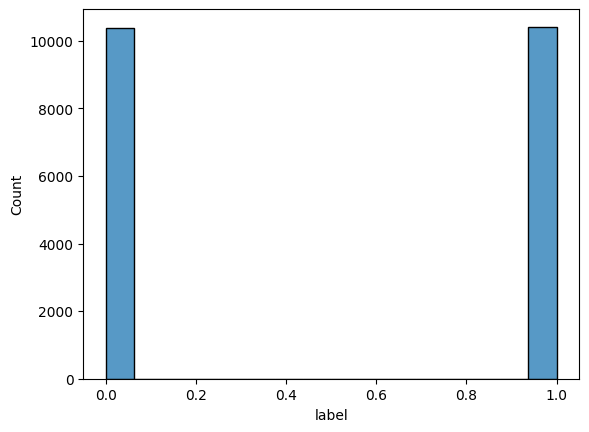

In [273]:
sn.histplot(df['label'])

In [274]:
filter_df=df[df['label']==1]
all_text = ' '.join(filter_df['news'].astype(str).tolist())


In [275]:
words = [word for word in all_text.split()]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))



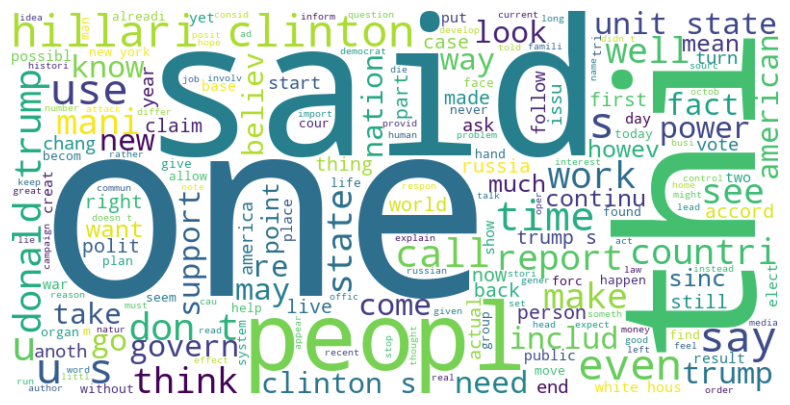

In [276]:
mp.figure(figsize=(10, 5))
mp.imshow(wordcloud, interpolation='bilinear')
mp.axis('off')
mp.show()

In [277]:
filter_df=df[df['label']==0]
all_text = ' '.join(filter_df['news'].astype(str).tolist())


In [278]:
words = [word for word in all_text.split()]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))



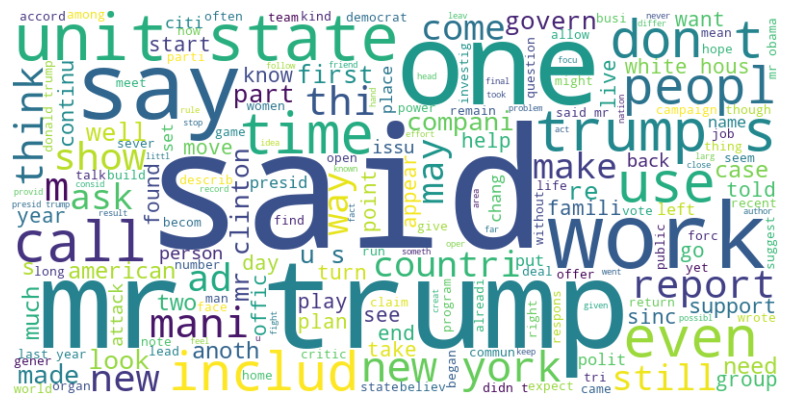

In [279]:
mp.figure(figsize=(10, 5))
mp.imshow(wordcloud, interpolation='bilinear')
mp.axis('off')
mp.show()

In [280]:
x=df['news'].values
y=df['label'].values

In [281]:
x

array(['darrel lucu hous dem aid  we didn t even see comey s letter until jason chaffetz tweet it by darrel lucu octob 30  2016 subscrib jason chaffetz stump american fork  utah imag courtesi michael jolley  avail creativ common by licens with apolog keith olbermann  doubt worst person the world week fbi director jame comey  but accord hous democrat aid  look like also know second worst person well  it turn comey sent now infam letter announc fbi look email may relat hillari clinton s email server  rank democrat relev committe didn t hear comey  they found via tweet one republican committe chairmen as know  comey notifi republican chairmen democrat rank member hous intellig  judiciari  oversight committe agenc review email recent discov order see contain classifi inform  not long letter went out  oversight committe chairman jason chaffetz set polit world ablaz tweet  fbi dir inform me the fbi learn exist email appear pertin investig case reopen  jason chaffetz jasoninthehous  octob 28 

In [282]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [283]:
word_vector=TfidfVectorizer()

In [284]:
x=word_vector.fit_transform(x)

In [285]:
x

<20800x115291 sparse matrix of type '<class 'numpy.float64'>'
	with 5604244 stored elements in Compressed Sparse Row format>

In [286]:
print(x)

  (0, 26870)	0.26339341117908194
  (0, 61713)	0.15302117711995525
  (0, 48217)	0.08377686707094752
  (0, 27910)	0.06749176201075023
  (0, 5812)	0.0992692862614853
  (0, 110743)	0.021741003645989125
  (0, 29217)	0.12651234181615972
  (0, 35404)	0.04361433030773412
  (0, 91235)	0.03843816381784151
  (0, 23104)	0.25863437668593403
  (0, 59811)	0.15529798692285562
  (0, 106930)	0.02884899655943256
  (0, 52744)	0.14430880013368058
  (0, 20298)	0.5714554630222767
  (0, 104973)	0.11683297731985497
  (0, 52060)	0.03396375504452872
  (0, 18138)	0.03229915173223909
  (0, 73766)	0.03595570094183976
  (0, 1892)	0.03723164326242023
  (0, 1369)	0.02594382022166253
  (0, 98188)	0.028747849768359778
  (0, 97973)	0.037645518759718145
  (0, 7305)	0.012165013821627439
  (0, 38701)	0.04045809641714793
  (0, 107390)	0.06726418031374827
  :	:
  (20799, 112944)	0.04788227007609963
  (20799, 110741)	0.04788227007609963
  (20799, 109237)	0.04788227007609963
  (20799, 92938)	0.036073615500640824
  (20799, 52100

In [287]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [288]:
x_train.shape

(16640, 115291)

In [289]:
y_train.shape

(16640,)

In [290]:
x_test.shape

(4160, 115291)

In [291]:
y_test.shape

(4160,)

In [292]:
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [293]:
y_pred=xg.predict(x_test)

In [294]:
print("The test accuracy",accuracy_score(y_test,y_pred))

The test accuracy 0.9685096153846153


In [295]:
y_pred=xg.predict(x_train)
print("The train accuracy",accuracy_score(y_train,y_pred))

The train accuracy 0.9991586538461539


In [298]:
classifiers = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1.0, 10.0]}),
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100]}),
    'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}),
    'XGB': (XGBClassifier(), {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]})
}

In [300]:


results = []
best_model = None
best_params = None
best_accuracy = 0
for name, (clf, params) in classifiers.items():
    grid = GridSearchCV(clf, params, cv=5, scoring='accuracy')
    grid.fit(x_train, y_train)
    
    best_clf = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_clf.predict(x_train))
    test_acc = accuracy_score(y_test, best_clf.predict(x_test))
    precision = precision_score(y_test, best_clf.predict(x_test))
    
    cv_scores = cross_val_score(best_clf, x, y, cv=5, scoring='accuracy')
    
    results.append({
        'Classifier': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std Accuracy': cv_scores.std(),
        'Best Params': grid.best_params_
    })
    
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_model = best_clf
        best_params = grid.best_params_



c:\Users\Anurag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anurag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anurag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Anurag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

In [ ]:
voting_clf = VotingClassifier(estimators=[(name, clf) for name, (clf, _) in classifiers.items()], voting='soft')
voting_clf.fit(x_train, y_train)

train_acc = accuracy_score(y_train, voting_clf.predict(x_train))
test_acc = accuracy_score(y_test, voting_clf.predict(x_test))
precision = precision_score(y_test, voting_clf.predict(x_test))
cv_scores = cross_val_score(voting_clf, X, y, cv=5, scoring='accuracy')

results.append({
    'Classifier': 'VotingClassifier',
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc,
    'Precision': precision,
    'CV Mean Accuracy': cv_scores.mean(),
    'CV Std Accuracy': cv_scores.std(),
    'Best Params': 'N/A'
})

if test_acc > best_accuracy:
    best_accuracy = test_acc
    best_model = voting_clf
    best_params = 'N/A'



In [ ]:
stack_clf = StackingClassifier(estimators=[(name, clf) for name, (clf, _) in classifiers.items()], final_estimator=LogisticRegression())
stack_clf.fit(x_train, y_train)

train_acc = accuracy_score(y_train, stack_clf.predict(x_train))
test_acc = accuracy_score(y_test, stack_clf.predict(x_test))
precision = precision_score(y_test, stack_clf.predict(x_test))
cv_scores = cross_val_score(stack_clf, x, y, cv=5, scoring='accuracy')


In [ ]:
results.append({
    'Classifier': 'StackingClassifier',
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc,
    'Precision': precision,
    'CV Mean Accuracy': cv_scores.mean(),
    'CV Std Accuracy': cv_scores.std(),
    'Best Params': 'N/A'
})

if test_acc > best_accuracy:
    best_accuracy = test_acc
    best_model = stack_clf
    best_params = 'N/A'

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
def plot_results(results_df):
    fig, axes = mp.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Performance Comparison')

    sn.barplot(ax=axes[0, 0], x='Classifier', y='Train Accuracy', data=results_df)
    axes[0, 0].set_title('Train Accuracy')
    axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

    sn.barplot(ax=axes[0, 1], x='Classifier', y='Test Accuracy', data=results_df)
    axes[0, 1].set_title('Test Accuracy')
    axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

    sn.barplot(ax=axes[1, 0], x='Classifier', y='CV Mean Accuracy', data=results_df)
    axes[1, 0].set_title('Cross-Validation Mean Accuracy')
    axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

    sn.barplot(ax=axes[1, 1], x='Classifier', y='CV Std Accuracy', data=results_df)
    axes[1, 1].set_title('Cross-Validation Std Accuracy')
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

    mp.tight_layout(rect=[0, 0, 1, 0.96])
    mp.show()

plot_results(results_df)


NameError: name 'results_df' is not defined

In [ ]:
print(f"The best model is: {best_model}")
print(f"With best parameters: {best_params}")
j.dump(best_model, 'best_model.pkl')
